In [10]:
# Step 0: Importing the  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz


In [11]:
# Loading the dataset
df = pd.read_csv("/content/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Loading of datasets and preparing the features

In [12]:


# Check and encode categorical columns
df = pd.get_dummies(df, columns=["cp", "thal", "slope"], drop_first=True)
df = df.astype(int)

# Split features and target


In [13]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1,2,0,0,0,0,0,0,1,0,1
1,53,1,140,203,1,0,155,1,3,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,1,125,1,2,0,0,0,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0,1,0,0,0,0,0,0,1,0,1
4,62,0,138,294,1,1,106,0,1,3,0,0,0,0,0,1,0,1,0


In [14]:
# spliting the dataset
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train Decision Tree Classifier & Visualize

In [15]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Accuracy
y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizing the decision tree
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()


Decision Tree Accuracy: 0.9902597402597403
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



'decision_tree.pdf'

# Analysing of the tree depth and overfitting

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
depths = range(1, 20)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_scores.append(train_acc)
    test_scores.append(test_acc)


In [19]:
print("training accuracies are:",train_scores)
print("testing accuracies are:",test_scores)

training accuracies are: [0.7754532775453278, 0.7754532775453278, 0.8549511854951185, 0.895397489539749, 0.9191073919107392, 0.9483960948396095, 0.9762900976290098, 0.9888423988842399, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
testing accuracies are: [0.724025974025974, 0.724025974025974, 0.8311688311688312, 0.8668831168831169, 0.8928571428571429, 0.9090909090909091, 0.935064935064935, 0.9642857142857143, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403, 0.9902597402597403]


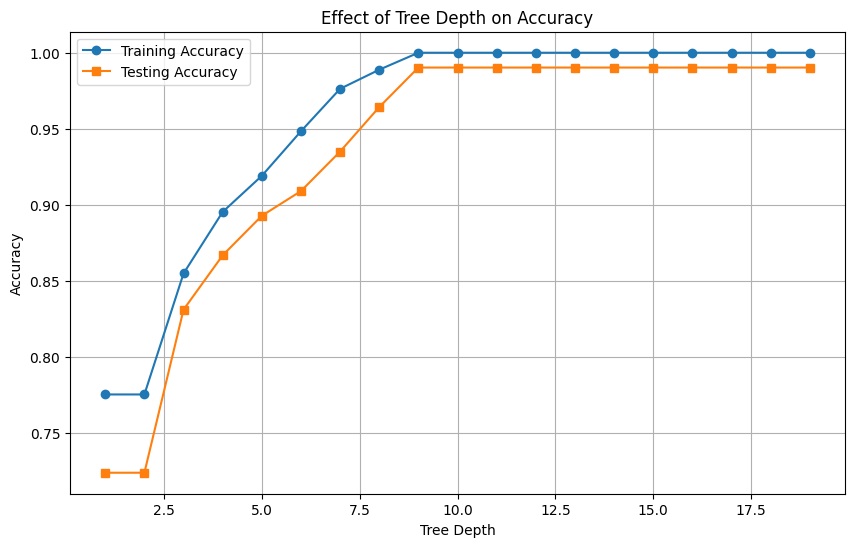

In [17]:
# plotting of training vs testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label="Training Accuracy", marker='o')
plt.plot(depths, test_scores, label="Testing Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.grid(True)
plt.show()



In [20]:
# After analysing the best depth is the 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Decision Tree
dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_tree = dtree.predict(X_test)

# Evaluation
print("Decision Tree (max_depth=8) Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree (max_depth=8) Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       159
           1       0.96      0.97      0.96       149

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



# Train Random Forest and compare accuracy

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9902597402597403


# Interpret Feature Importances

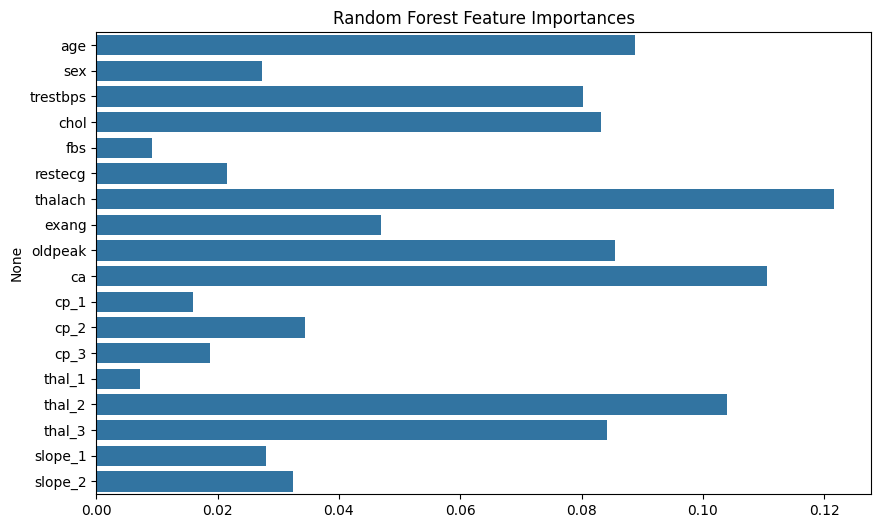

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Random Forest Feature Importances')
plt.show()


# Cross-validation for both models



In [23]:
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores_tree = cross_val_score(dtree, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {cv_scores_tree.mean():.3f} ± {cv_scores_tree.std():.3f}")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}")


Decision Tree CV Accuracy: 0.982 ± 0.013
Random Forest CV Accuracy: 0.994 ± 0.007
